In [1]:
import numpy as np # Load the numpy library
import matplotlib.pyplot as plt # Load the pyplot library to plot
from matplotlib.dates import date2num, num2date, datetime
from matplotlib import rcParams as rcp # library to modify graphics

In [2]:
rcp['lines.linewidth'] = 2.
rcp['font.family'] = 'sans serif'
rcp['font.size'] = 18

In [3]:
!git clone https://github.com/cdcmx2020a/group_A_AlmaJair.git

Cloning into 'group_A_AlmaJair'...
remote: Enumerating objects: 297, done.
remote: Counting objects: 100% (297/297), done.
remote: Compressing objects: 100% (227/227), done.
remote: Total 297 (delta 114), reused 215 (delta 65), pack-reused 0
Receiving objects: 100% (297/297), 43.24 MiB | 25.64 MiB/s, done.
Resolving deltas: 100% (114/114), done.


In [4]:
# Obtener casos diarios Mty
mat = np.loadtxt('/content/group_A_AlmaJair/datos_covid/casos_diarios_mty.csv',delimiter=',')
print(mat)

[[1.201202e+07 1.301202e+07 1.401202e+07 1.501202e+07 1.601202e+07
  1.701202e+07 1.801202e+07 1.901202e+07 2.001202e+07 2.101202e+07
  2.201202e+07 2.301202e+07 2.401202e+07 2.501202e+07 2.601202e+07
  2.701202e+07 2.801202e+07 2.901202e+07 3.001202e+07 3.101202e+07
  1.022020e+06 2.022020e+06 3.022020e+06 4.022020e+06 5.022020e+06
  6.022020e+06 7.022020e+06 8.022020e+06 9.022020e+06 1.002202e+07
  1.102202e+07 1.202202e+07 1.302202e+07 1.402202e+07 1.502202e+07
  1.602202e+07 1.702202e+07 1.802202e+07 1.902202e+07 2.002202e+07
  2.102202e+07 2.202202e+07 2.302202e+07 2.402202e+07 2.502202e+07
  2.602202e+07 2.702202e+07 2.802202e+07 2.902202e+07 1.032020e+06
  2.032020e+06 3.032020e+06 4.032020e+06 5.032020e+06 6.032020e+06
  7.032020e+06 8.032020e+06 9.032020e+06 1.003202e+07 1.103202e+07
  1.203202e+07 1.303202e+07 1.403202e+07 1.503202e+07 1.603202e+07
  1.703202e+07 1.803202e+07 1.903202e+07 2.003202e+07 2.103202e+07
  2.203202e+07 2.303202e+07 2.403202e+07 2.503202e+07 2.603202

In [5]:
# Date of city
time = mat[0,:]
str(mat[0,0]) # dia , mes y año

'12012020.0'

In [6]:
cases_mty = mat[1,:] # number of cases in city

In [7]:
# Loads time mm,dd,yyyy HH,mm
time_final = np.zeros(time.shape[0])
for ii in range(time.shape[0]):
    if np.ma.is_masked(time[ii]) == False:
        if len(str(time[ii])) == 10:
            time_final[ii] = date2num(datetime.datetime(np.int(str(time[ii])[4:-2]), np.int(str(time[ii])[2:4]), np.int(str(time[ii])[0:2])))
        else:
            time_final[ii] = date2num(datetime.datetime(np.int(str(time[ii])[3:-2]), np.int(str(time[ii])[1:3]),
                                                            np.int(str(time[ii])[0:1])))

In [8]:
# Calcula el running mean, promedio de cada X dias
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [9]:
# calculate 14-day average
cases_lp = running_mean(cases_mty[1:], 14)

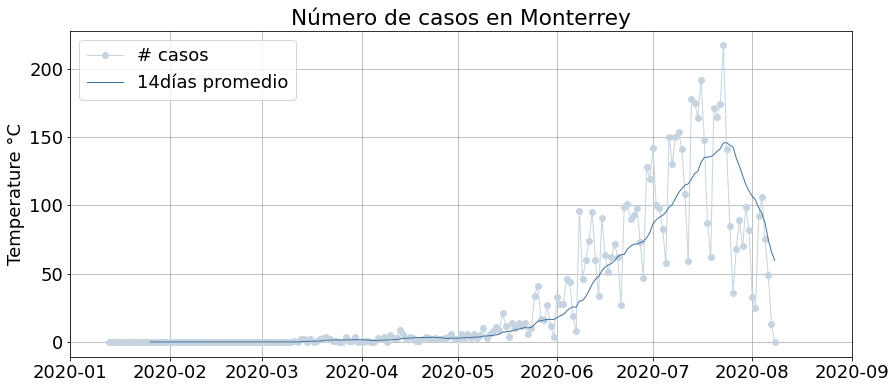

In [10]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(14, 6))
tit = 'Número de casos en Monterrey'
ax.plot(num2date(time_final[1:]), cases_mty[1:], 'o-', lw=1, color='#C6D4E1', label='# casos')
ax.plot(num2date(time_final[len(cases_mty)-len(cases_lp):]), cases_lp, lw=1, color='#44749D', label='14días promedio')

ax.set_title(tit)
ax.set_ylabel('# casos')
ax.legend(loc=2)
fi1 = date2num(datetime.datetime.strptime('2020-01', '%Y-%m'))
fi2 = date2num(datetime.datetime.strptime('2020-09', '%Y-%m'))
ax.set_xlim(fi1, fi2)
ax.set_ylabel('Temperature °C')
ax.grid()
plt.savefig('Figura_Casos_Monterrey.png', bbox_inches='tight')

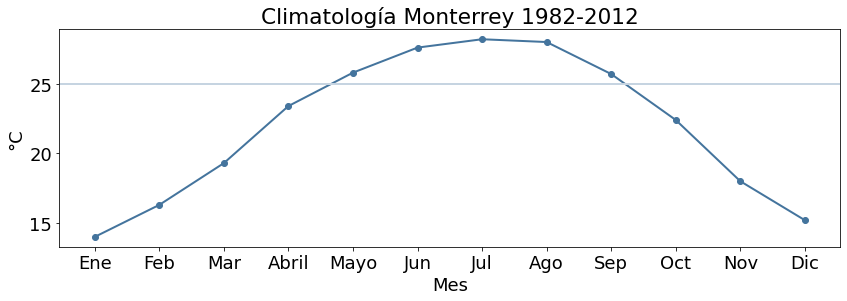

In [11]:
# Climatologia Monterrey 1982-2012
# Buscar datos de climatologia aqui https://es.climate-data.org/america-del-norte/mexico/nuevo-leon/monterrey-3106/
temp_clim = np.asarray([14,	16.3,	19.3,	23.4,	25.8,	27.6,	28.2,	28,	25.7,	22.4,	18,	15.2])
month = np.arange(1, 13, 1)
fig, axs = plt.subplots(1,1, figsize=(14,4))
axs.plot(month, temp_clim, 'o-', color='#44749D')
axs.axhline(y=25, color='#C6D4E1')
axs.set_xticks(month);
axs.set_xticklabels(['Ene','Feb', 'Mar','Abril', 'Mayo', 'Jun', 'Jul','Ago', 'Sep', 'Oct','Nov','Dic'])
axs.set_xlabel('Mes')
axs.set_ylabel('°C')
axs.set_title('Climatología Monterrey 1982-2012')
plt.savefig('Figura_Climatologia_Mty')

In [12]:
mat = np.loadtxt('/content/group_A_AlmaJair/datos_covid/contaminantes_centro_2020.csv', delimiter=',')
# Loads Mty centro pollutant file

In [13]:
# Loads time mm,dd,yyyy HH,mm; genera las fechas por hora del file de contaminantes de nl
month = mat[:, 1]
day = mat[:, 0]
year = mat[:, 2]
hour = mat[:, 3]
time = np.zeros(year.shape[0])
for ii in range(year.shape[0]):
    time[ii] = date2num(datetime.datetime(np.int(year[ii] + 2000), np.int(month[ii]),
                         np.int(day[ii]), np.int(hour[ii])))

In [14]:
# This depends on the file
o3 = np.ma.masked_invalid(mat[:, 5])
pm25 = np.ma.masked_invalid(mat[:, 7]) 
temp = np.ma.masked_invalid(mat[:, 8])

In [15]:
lin2 = np.int(np.floor((o3.shape[0]/24)))
lin = np.int(o3.shape[0] - lin2 * 24)

In [16]:
# Take daily Maximum
time_day = np.reshape(time[:-lin], (lin2, 24)).mean(1)
o3_day = np.reshape(o3[:-lin], (lin2, 24)) 
pm25_day = np.reshape(pm25[:-lin], (lin2, 24))

In [17]:
for ii in range(pm25_day.shape[0]):
  if (pm25_day[ii, ~pm25_day[ii, :].mask].size) < 18:
    pm25_day[ii, :] = np.ma.masked # si tengo menos de 18 hrs es dato malo

In [18]:
for ii in range(o3_day.shape[0]):
  if (o3_day[ii, ~o3_day[ii, :].mask].size) < 18:
    o3_day[ii, :] = np.ma.masked # si tengo menos de 18 hrs es dato malo

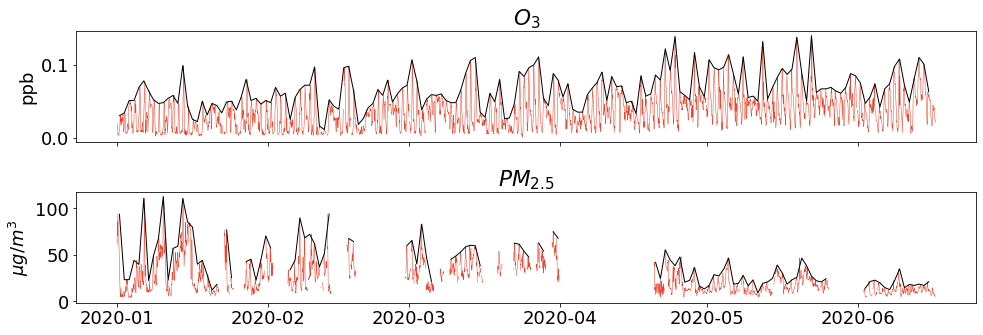

In [19]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(14, 5))
ax = axs[0]
tit = '$O_3$'
units = 'ppb'
ax.plot(num2date(time), o3, lw=0.5, color = '#EE442F')
ax.plot(num2date(time_day), o3_day.max(1), lw=1, color = 'k')
ax.set_title(tit)
ax.set_ylabel(units)
# ax.set_ylim(0, 1.5e-1)

ax = axs[1]
tit = '$PM_{2.5}$'
units = '$\mu g/m^3$'
ax.plot(num2date(time), pm25, lw=0.5, color='#EE442F')
ax.plot(num2date(time_day), pm25_day.max(1), lw=1, color = 'k')
ax.set_title(tit)
ax.set_ylabel(units)

fi1 = date2num(datetime.datetime.strptime('2020-01', '%Y-%m'))
fi2 = date2num(datetime.datetime.strptime('2020-06', '%Y-%m'))
# ax.set_xlim(fi1, fi2)
plt.tight_layout()
plt.savefig('pollutants_raw.png', bbox_inches='tight')

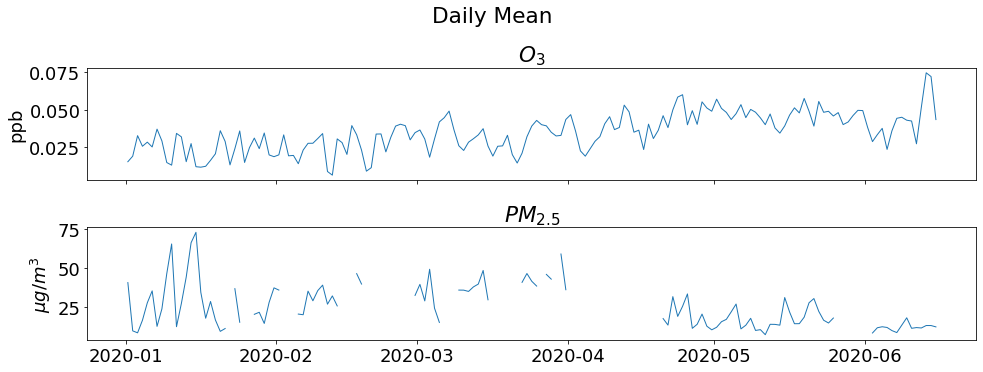

In [20]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(14, 5))
ax = axs[0]
tit = '$O_3$'
units = 'ppb'
ax.plot(num2date(time_day), o3_day.mean(1), lw=1)
ax.set_title(tit)
ax.set_ylabel(units)
# ax.set_ylim(0, 1.5e-1)

ax = axs[1]
tit = '$PM_{2.5}$'
units = '$\mu g/m^3$'
ax.plot(num2date(time_day), pm25_day.mean(1), lw=1)
ax.set_title(tit)
ax.set_ylabel(units)
# ax.set_ylim(0, 90)

# fi1 = date2num(datetime.datetime.strptime('2020-01', '%Y-%m'))
# fi2 = date2num(datetime.datetime.strptime('2020-06', '%Y-%m'))
# ax.set_xlim(fi1, fi2)
fig.suptitle('Daily Mean', y=1.05)
plt.tight_layout()
plt.savefig('daily_mean_pollutants.png', bbox_inches='tight')

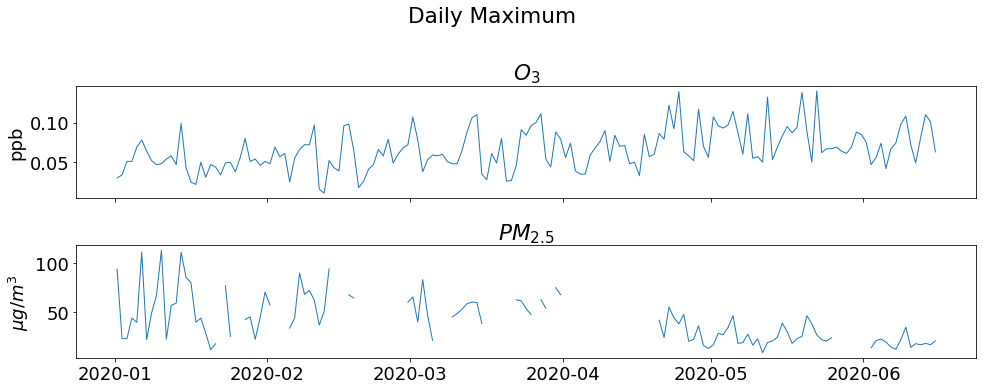

In [21]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(14, 5))
ax = axs[0]
tit = '$O_3$'
units = 'ppb'
ax.plot(num2date(time_day), o3_day.max(1), lw=1)
ax.set_title(tit)
ax.set_ylabel(units)
# ax.set_ylim(0, 1.5e-1)

ax = axs[1]
tit = '$PM_{2.5}$'
units = '$\mu g/m^3$'
ax.plot(num2date(time_day), pm25_day.max(1), lw=1)
ax.set_title(tit)
ax.set_ylabel(units)
# ax.set_ylim(0, 90)

# fi1 = date2num(datetime.datetime.strptime('2020-01', '%Y-%m'))
# fi2 = date2num(datetime.datetime.strptime('2020-06', '%Y-%m'))
# ax.set_xlim(fi1, fi2)
fig.suptitle('Daily Maximum', y=1.1)
plt.tight_layout()
plt.savefig('daily_max_pollutants.png', bbox_inches='tight')